In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#Loading the data
df1=pd.read_csv('train_Df64byy.csv')
df2=pd.read_csv('test_YCcRUnU.csv')

In [31]:
#making copy
df_train=df1.copy()
df_test=df2.copy()

## EDA

In [32]:
#Shape of the data
print('Train data shape is: ',df_train.shape)
print('Test data shape is: ',df_test.shape)
#print('All data shape is:',df_all.shape)

Train data shape is:  (50882, 14)
Test data shape is:  (21805, 13)


In [33]:
df_train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [34]:
df_train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

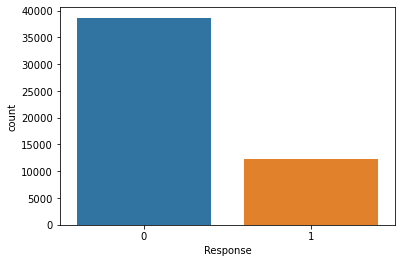

In [36]:
#Checking balance in the data
sns.countplot(df_train['Response'])

In [37]:
#Missing value check in Train set
df_train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [38]:
df_test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [39]:
for feature in df_train.columns[:]:
    print(feature,':',len(df_train[feature].unique()),'labels')

ID : 50882 labels
City_Code : 36 labels
Region_Code : 5316 labels
Accomodation_Type : 2 labels
Reco_Insurance_Type : 2 labels
Upper_Age : 58 labels
Lower_Age : 60 labels
Is_Spouse : 2 labels
Health Indicator : 10 labels
Holding_Policy_Duration : 16 labels
Holding_Policy_Type : 5 labels
Reco_Policy_Cat : 22 labels
Reco_Policy_Premium : 6977 labels
Response : 2 labels


In [40]:
for feature in df_test.columns[:]:
    print(feature,':',len(df_test[feature].unique()),'labels')

ID : 21805 labels
City_Code : 36 labels
Region_Code : 4694 labels
Accomodation_Type : 2 labels
Reco_Insurance_Type : 2 labels
Upper_Age : 58 labels
Lower_Age : 60 labels
Is_Spouse : 2 labels
Health Indicator : 10 labels
Holding_Policy_Duration : 16 labels
Holding_Policy_Type : 5 labels
Reco_Policy_Cat : 22 labels
Reco_Policy_Premium : 5226 labels


## Missing value handling

In [57]:
df_train['Health Indicator']=df_train['Health Indicator'].fillna('Unknown_HI')
df_train['Holding_Policy_Duration']=df_train['Holding_Policy_Duration'].fillna('Unknown_HPD')
df_train['Holding_Policy_Type']=df_train['Holding_Policy_Type'].fillna('Unknown_HPT')

df_test['Health Indicator']=df_test['Health Indicator'].fillna('Unknown_HI')
df_test['Holding_Policy_Duration']=df_test['Holding_Policy_Duration'].fillna('Unknown_HPD')
df_test['Holding_Policy_Type']=df_test['Holding_Policy_Type'].fillna('Unknown_HPT')

reduced_X_train=df_train
reduced_X_test=df_test
reduced_X_train.shape

(50882, 14)

In [58]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:50881], all_data.loc[50882:].drop(['Response'], axis=1)

In [59]:
df_all_reduced=concat_df(reduced_X_train,reduced_X_test)
df_all_reduced.head()

,Accomodation_Type,City_Code,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,ID,Is_Spouse,Lower_Age,Reco_Insurance_Type,Reco_Policy_Cat,Reco_Policy_Premium,Region_Code,Response,Upper_Age
0,Rented,C3,X1,14+,3,1,No,36,Individual,22,11628.0,3213,0.0,36
1,Owned,C5,X2,Unknown_HPD,Unknown_HPT,2,No,22,Joint,22,30510.0,1117,0.0,75
2,Owned,C5,Unknown_HI,1.0,1,3,No,32,Individual,19,7450.0,3732,1.0,32
3,Owned,C24,X1,14+,3,4,No,48,Joint,19,17780.0,4378,0.0,52
4,Rented,C8,X2,3.0,1,5,No,44,Individual,16,10404.0,2190,0.0,44


In [60]:
#Handling categorical value
cat_columns=['City_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Reco_Policy_Cat']
#cat_columns=['City_Code','Region_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Reco_Policy_Cat']

for col in cat_columns:
    df_all_reduced[col]=pd.Categorical(df_all_reduced[col])
df_all_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72687 entries, 0 to 72686
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Accomodation_Type        72687 non-null  category
 1   City_Code                72687 non-null  category
 2   Health Indicator         72687 non-null  object  
 3   Holding_Policy_Duration  72687 non-null  object  
 4   Holding_Policy_Type      72687 non-null  object  
 5   ID                       72687 non-null  int64   
 6   Is_Spouse                72687 non-null  category
 7   Lower_Age                72687 non-null  int64   
 8   Reco_Insurance_Type      72687 non-null  category
 9   Reco_Policy_Cat          72687 non-null  category
 10  Reco_Policy_Premium      72687 non-null  float64 
 11  Region_Code              72687 non-null  int64   
 12  Response                 50882 non-null  float64 
 13  Upper_Age                72687 non-null  int64   
dtypes: cat

In [61]:
df_all_reduced.shape

(72687, 14)

cat_features = ['City_Code','Region_Code','Accomodation_Type','Reco_Insurance_Type','Is_Spouse','Reco_Policy_Cat']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Response', data=df_train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

In [62]:
#Dropping Region code 
#df_all_reduced=df_all_reduced.drop('Region_Code',axis=1)

In [63]:
df_red_ohe=pd.get_dummies(df_all_reduced)
df_red_ohe.head()

,ID,Lower_Age,Reco_Policy_Premium,Region_Code,Response,Upper_Age,Accomodation_Type_Owned,Accomodation_Type_Rented,City_Code_C1,City_Code_C10,...,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22
0,1,36,11628.0,3213,0.0,36,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,22,30510.0,1117,0.0,75,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,32,7450.0,3732,1.0,32,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,48,17780.0,4378,0.0,52,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,44,10404.0,2190,0.0,44,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [64]:
# splitting into train and test
train_df,X_test=divide_df(df_red_ohe)
X_test.head(2)

,ID,Lower_Age,Reco_Policy_Premium,Region_Code,Upper_Age,Accomodation_Type_Owned,Accomodation_Type_Rented,City_Code_C1,City_Code_C10,City_Code_C11,...,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22
50882,50883,30,11934.0,156,30,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
50883,50884,68,32204.8,7,69,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [65]:
train_df.head(2)

,ID,Lower_Age,Reco_Policy_Premium,Region_Code,Response,Upper_Age,Accomodation_Type_Owned,Accomodation_Type_Rented,City_Code_C1,City_Code_C10,...,Reco_Policy_Cat_13,Reco_Policy_Cat_14,Reco_Policy_Cat_15,Reco_Policy_Cat_16,Reco_Policy_Cat_17,Reco_Policy_Cat_18,Reco_Policy_Cat_19,Reco_Policy_Cat_20,Reco_Policy_Cat_21,Reco_Policy_Cat_22
0,1,36,11628.0,3213,0.0,36,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,22,30510.0,1117,0.0,75,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [66]:
X=train_df.drop('Response',axis=1)
y=train_df['Response']

In [67]:
#splitting the dataset
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=42,stratify=train_df['Response'])
print('X_train shape is : {} and y_train shape is {}'.format(X_train.shape,y_train.shape))
print('X_valid shape is : {} and y_valid shape is {}'.format(X_valid.shape,y_valid.shape))

X_train shape is : (40705, 100) and y_train shape is (40705,)
X_valid shape is : (10177, 100) and y_valid shape is (10177,)


In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [73]:
from xgboost import XGBClassifier

In [76]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF',RandomForestClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGB', XGBClassifier()))
#models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.500490 (0.006682)
RF: 0.647010 (0.007144)
LDA: 0.622497 (0.006885)
KNN: 0.505976 (0.006961)
CART: 0.548076 (0.006186)
NB: 0.608549 (0.007688)


C:\Users\MANISH\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:12:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MANISH\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:12:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MANISH\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:13:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MANISH\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:13:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\MANISH\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:13:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB: 0.646994 (0.005421)


In [77]:
#ftting the model

model_xgb=XGBClassifier()
model_xgb.fit(X_train,y_train)

C:\Users\MANISH\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:13:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
#Evaluation on validation set
y_pred = model_rf.predict(X_valid)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [79]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_valid, model_xgb.predict_proba(X_valid)[:, 1])

0.6554287260169613

In [80]:
model_xgb.predict_proba(X_valid)[:, 1]

array([0.31187382, 0.09335767, 0.1439732 , ..., 0.32923967, 0.28866726,
       0.29646224], dtype=float32)

In [82]:
#model fitting on whole data 
model=XGBClassifier()
model.fit(X,y)

C:\Users\MANISH\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:15:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
y_test_pred=model.predict_proba(X_test)[:,1]
y_test_pred

array([0.1838998 , 0.5910076 , 0.16336347, ..., 0.0080631 , 0.08922394,
       0.224404  ], dtype=float32)

In [85]:
submission_df=pd.DataFrame(columns=['ID','Response'])
submission_df['ID']=X_test['ID'].reset_index(drop=True)
submission_df['Response']=pd.Series(y_test_pred)
submission_df.to_csv('submission_2.csv', header=True,index=False)
submission_df.head(5)

,ID,Response
0,50883,0.183900
1,50884,0.591008
2,50885,0.163363
3,50886,0.085113
4,50887,0.388767
